# Titanic 🚢

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [203]:
url = 'https://raw.githubusercontent.com/bdemeshev/coursera_metrics/master/lab_07/titanic3.csv'

## Import Dataset in DataFrame

In [204]:
titanic = pd.read_csv(url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Import Dataset Titanic
Voici le lien du dataset [titanic](https://raw.githubusercontent.com/bdemeshev/coursera_metrics/master/lab_07/titanic3.csv)

In [205]:
titanic.drop(axis=1, columns=['Unnamed: 0'], inplace=True)

In [206]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3rd,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,Cherbourg,NaN,328.0,NaN
1305,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,NaN,NaN
1306,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,Cherbourg,NaN,304.0,NaN
1307,3rd,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,Cherbourg,NaN,NaN,NaN
1308,3rd,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,Southampton,NaN,NaN,NaN


# EDA 🔬

In [207]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [208]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 143.3+ KB


In [209]:
# pandas_profile

# import pandas_profiling as pdp

# EDA_titanic =  pdp.ProfileReport(titanic)
# EDA_titanic.to_file("eda_titanic.html")
# EDA_titanic

In [210]:
# import sweetviz as sv

# my_report = sv.analyze(titanic)
# my_report.show_html()

#### Observation EDA

##### Remove Nans Columns
+ name drop
+ body drop
+ boat drop
+ home.dest
+ cabin

##### Remove Nans rows in column
+ age drop empty rows

### 🧳 ticket

In [211]:
# Forte dispersion

titanic.ticket

0        24160
1       113781
2       113781
3       113781
4       113781
         ...  
1304      2665
1305      2665
1306      2656
1307      2670
1308    315082
Name: ticket, Length: 1309, dtype: object

#### 🚮 Drop Nans Columns

In [212]:
titanic.drop(axis=1, columns=['name', 'boat', 'home.dest', 'body', 'cabin','ticket'], inplace=True)

#### Remove Nans Rows in Age

In [213]:
titanic[~titanic.age.isna()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1st,1,female,29.0000,0,0,211.337494,Southampton
1,1st,1,male,0.9167,1,2,151.550003,Southampton
2,1st,0,female,2.0000,1,2,151.550003,Southampton
3,1st,0,male,30.0000,1,2,151.550003,Southampton
4,1st,0,female,25.0000,1,2,151.550003,Southampton
...,...,...,...,...,...,...,...,...
1301,3rd,0,male,45.5000,0,0,7.225000,Cherbourg
1304,3rd,0,female,14.5000,1,0,14.454200,Cherbourg
1306,3rd,0,male,26.5000,0,0,7.225000,Cherbourg
1307,3rd,0,male,27.0000,0,0,7.225000,Cherbourg


In [214]:
titanic = titanic[~titanic.age.isna()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   object 
 1   survived  1046 non-null   int64  
 2   sex       1046 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1046 non-null   int64  
 5   parch     1046 non-null   int64  
 6   fare      1045 non-null   float64
 7   embarked  1044 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 73.5+ KB


In [215]:
titanic.sex.unique()

array(['female', 'male'], dtype=object)

### Types de Colonnes

In [216]:
titanic.sex.dtype

dtype('O')

In [217]:
for col in titanic.columns:
    if titanic[col].dtype == object:
        print(col)

pclass
sex
embarked


In [218]:
#! To use for Pipelines
columns_categorical = [col for col in titanic.columns if titanic[col].dtype == object]
columns_categorical

['pclass', 'sex', 'embarked']

### 🔢 Changer Valeur Categorielle en numerique

In [219]:
titanic.pclass.unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [220]:
titanic.pclass = titanic.pclass.map({
    '1st': 1, 
    '2nd': 2, 
    '3rd': 3
})

# titanic.pclass.str.replace(r'pattern') alternative

In [221]:
titanic.pclass.unique()

array([1, 2, 3], dtype=int64)

## 👫 Sex

In [222]:
titanic.sex.unique()

array(['female', 'male'], dtype=object)

In [223]:
dico_sex = {
   'female': 0, 
   'male':1 
}

titanic.sex = titanic.sex.map(dico_sex)
titanic.sex.unique()

array([0, 1], dtype=int64)

### 📶 Summary

In [224]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   int64  
 1   survived  1046 non-null   int64  
 2   sex       1046 non-null   int64  
 3   age       1046 non-null   float64
 4   sibsp     1046 non-null   int64  
 5   parch     1046 non-null   int64  
 6   fare      1045 non-null   float64
 7   embarked  1044 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 73.5+ KB


### 👨‍👨‍👧‍👦 Family 
#### parch - sibsp

In [225]:
#Number of relative PC
titanic['parch'].unique()

array([0, 2, 1, 4, 3, 5, 6], dtype=int64)

In [226]:
# Number of relatibe SB
titanic['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

## 🗺 Embarked


In [227]:
titanic.embarked.unique()

array(['Southampton', 'Cherbourg', nan, 'Queenstown'], dtype=object)

In [228]:
titanic.embarked.fillna( value="Unknown", inplace=True)

In [229]:
titanic.embarked.unique()

array(['Southampton', 'Cherbourg', 'Unknown', 'Queenstown'], dtype=object)

In [230]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1046 non-null   int64  
 1   survived  1046 non-null   int64  
 2   sex       1046 non-null   int64  
 3   age       1046 non-null   float64
 4   sibsp     1046 non-null   int64  
 5   parch     1046 non-null   int64  
 6   fare      1045 non-null   float64
 7   embarked  1046 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 73.5+ KB


In [231]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.337494,Southampton
1,1,1,1,0.9167,1,2,151.550003,Southampton
2,1,0,0,2.0000,1,2,151.550003,Southampton
3,1,0,1,30.0000,1,2,151.550003,Southampton
4,1,0,0,25.0000,1,2,151.550003,Southampton


In [232]:
titanic = pd.get_dummies(titanic, columns=['embarked'], prefix='embarked_at')
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_at_Cherbourg,embarked_at_Queenstown,embarked_at_Southampton,embarked_at_Unknown
0,1,1,0,29.0000,0,0,211.337494,0,0,1,0
1,1,1,1,0.9167,1,2,151.550003,0,0,1,0
2,1,0,0,2.0000,1,2,151.550003,0,0,1,0
3,1,0,1,30.0000,1,2,151.550003,0,0,1,0
4,1,0,0,25.0000,1,2,151.550003,0,0,1,0


In [233]:
# Drop embarked_at_Unknown
titanic.drop(axis=1, columns="embarked_at_Unknown", inplace=True)

In [234]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_at_Cherbourg,embarked_at_Queenstown,embarked_at_Southampton
0,1,1,0,29.0000,0,0,211.337494,0,0,1
1,1,1,1,0.9167,1,2,151.550003,0,0,1
2,1,0,0,2.0000,1,2,151.550003,0,0,1
3,1,0,1,30.0000,1,2,151.550003,0,0,1
4,1,0,0,25.0000,1,2,151.550003,0,0,1


In [235]:
titanic.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_at_Cherbourg,embarked_at_Queenstown,embarked_at_Southampton
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000,1045.000000,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,0.629063,29.881135,0.502868,0.42065,36.686080,0.202677,0.047801,0.747610
std,0.841497,0.491740,0.483287,14.413500,0.912167,0.83975,55.732534,0.402186,0.213447,0.434592
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,0.000000,0.00000,8.050000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,28.000000,0.000000,0.00000,15.750000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,1.00000,35.500000,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.00000,512.329224,1.000000,1.000000,1.000000


In [236]:
titanic.corr()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_at_Cherbourg,embarked_at_Queenstown,embarked_at_Southampton
pclass,1.000000,-0.320486,0.144695,-0.408106,0.047221,0.017224,-0.565255,-0.316627,0.152517,0.224429
survived,-0.320486,1.000000,-0.538000,-0.055513,-0.012213,0.114438,0.249164,0.219949,-0.067568,-0.175663
sex,0.144695,-0.538000,1.000000,0.063646,-0.095267,-0.221144,-0.187930,-0.095321,-0.050587,0.118791
age,-0.408106,-0.055513,0.063646,1.000000,-0.243699,-0.150917,0.178739,0.085777,-0.019458,-0.075971
sibsp,0.047221,-0.012213,-0.095267,-0.243699,1.000000,0.374456,0.141184,-0.045930,0.004210,0.042865
parch,0.017224,0.114438,-0.221144,-0.150917,0.374456,1.000000,0.216723,0.002330,-0.048223,0.023734
fare,-0.565255,0.249164,-0.187930,0.178739,0.141184,0.216723,1.000000,0.324103,-0.083622,-0.262296
embarked_at_Cherbourg,-0.316627,0.219949,-0.095321,0.085777,-0.045930,0.002330,0.324103,1.000000,-0.112964,-0.867733
embarked_at_Queenstown,0.152517,-0.067568,-0.050587,-0.019458,0.004210,-0.048223,-0.083622,-0.112964,1.000000,-0.385618
embarked_at_Southampton,0.224429,-0.175663,0.118791,-0.075971,0.042865,0.023734,-0.262296,-0.867733,-0.385618,1.000000


### Graphiques 🆗

<AxesSubplot:>

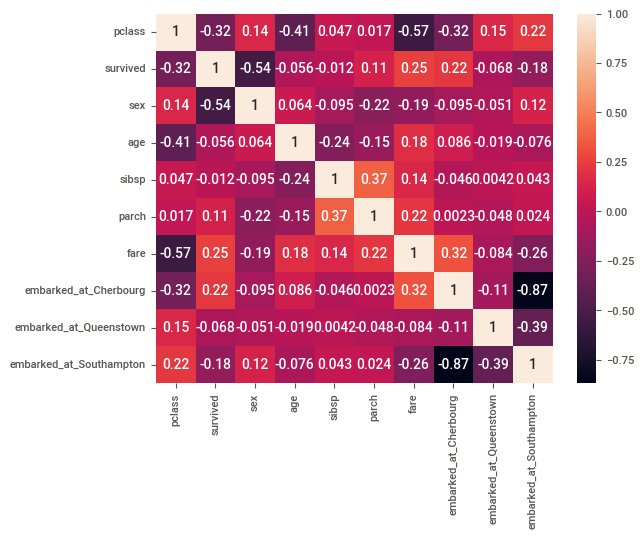

In [237]:
import seaborn as sns

sns.heatmap(titanic.corr(), color='blue', annot=True)

In [238]:
titanic.pclass.value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot:>

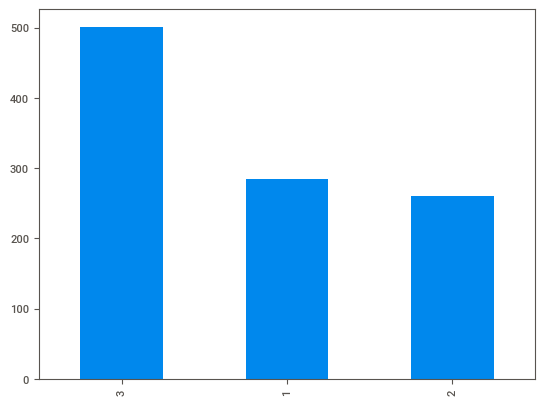

In [239]:
titanic.pclass.value_counts().plot.bar()

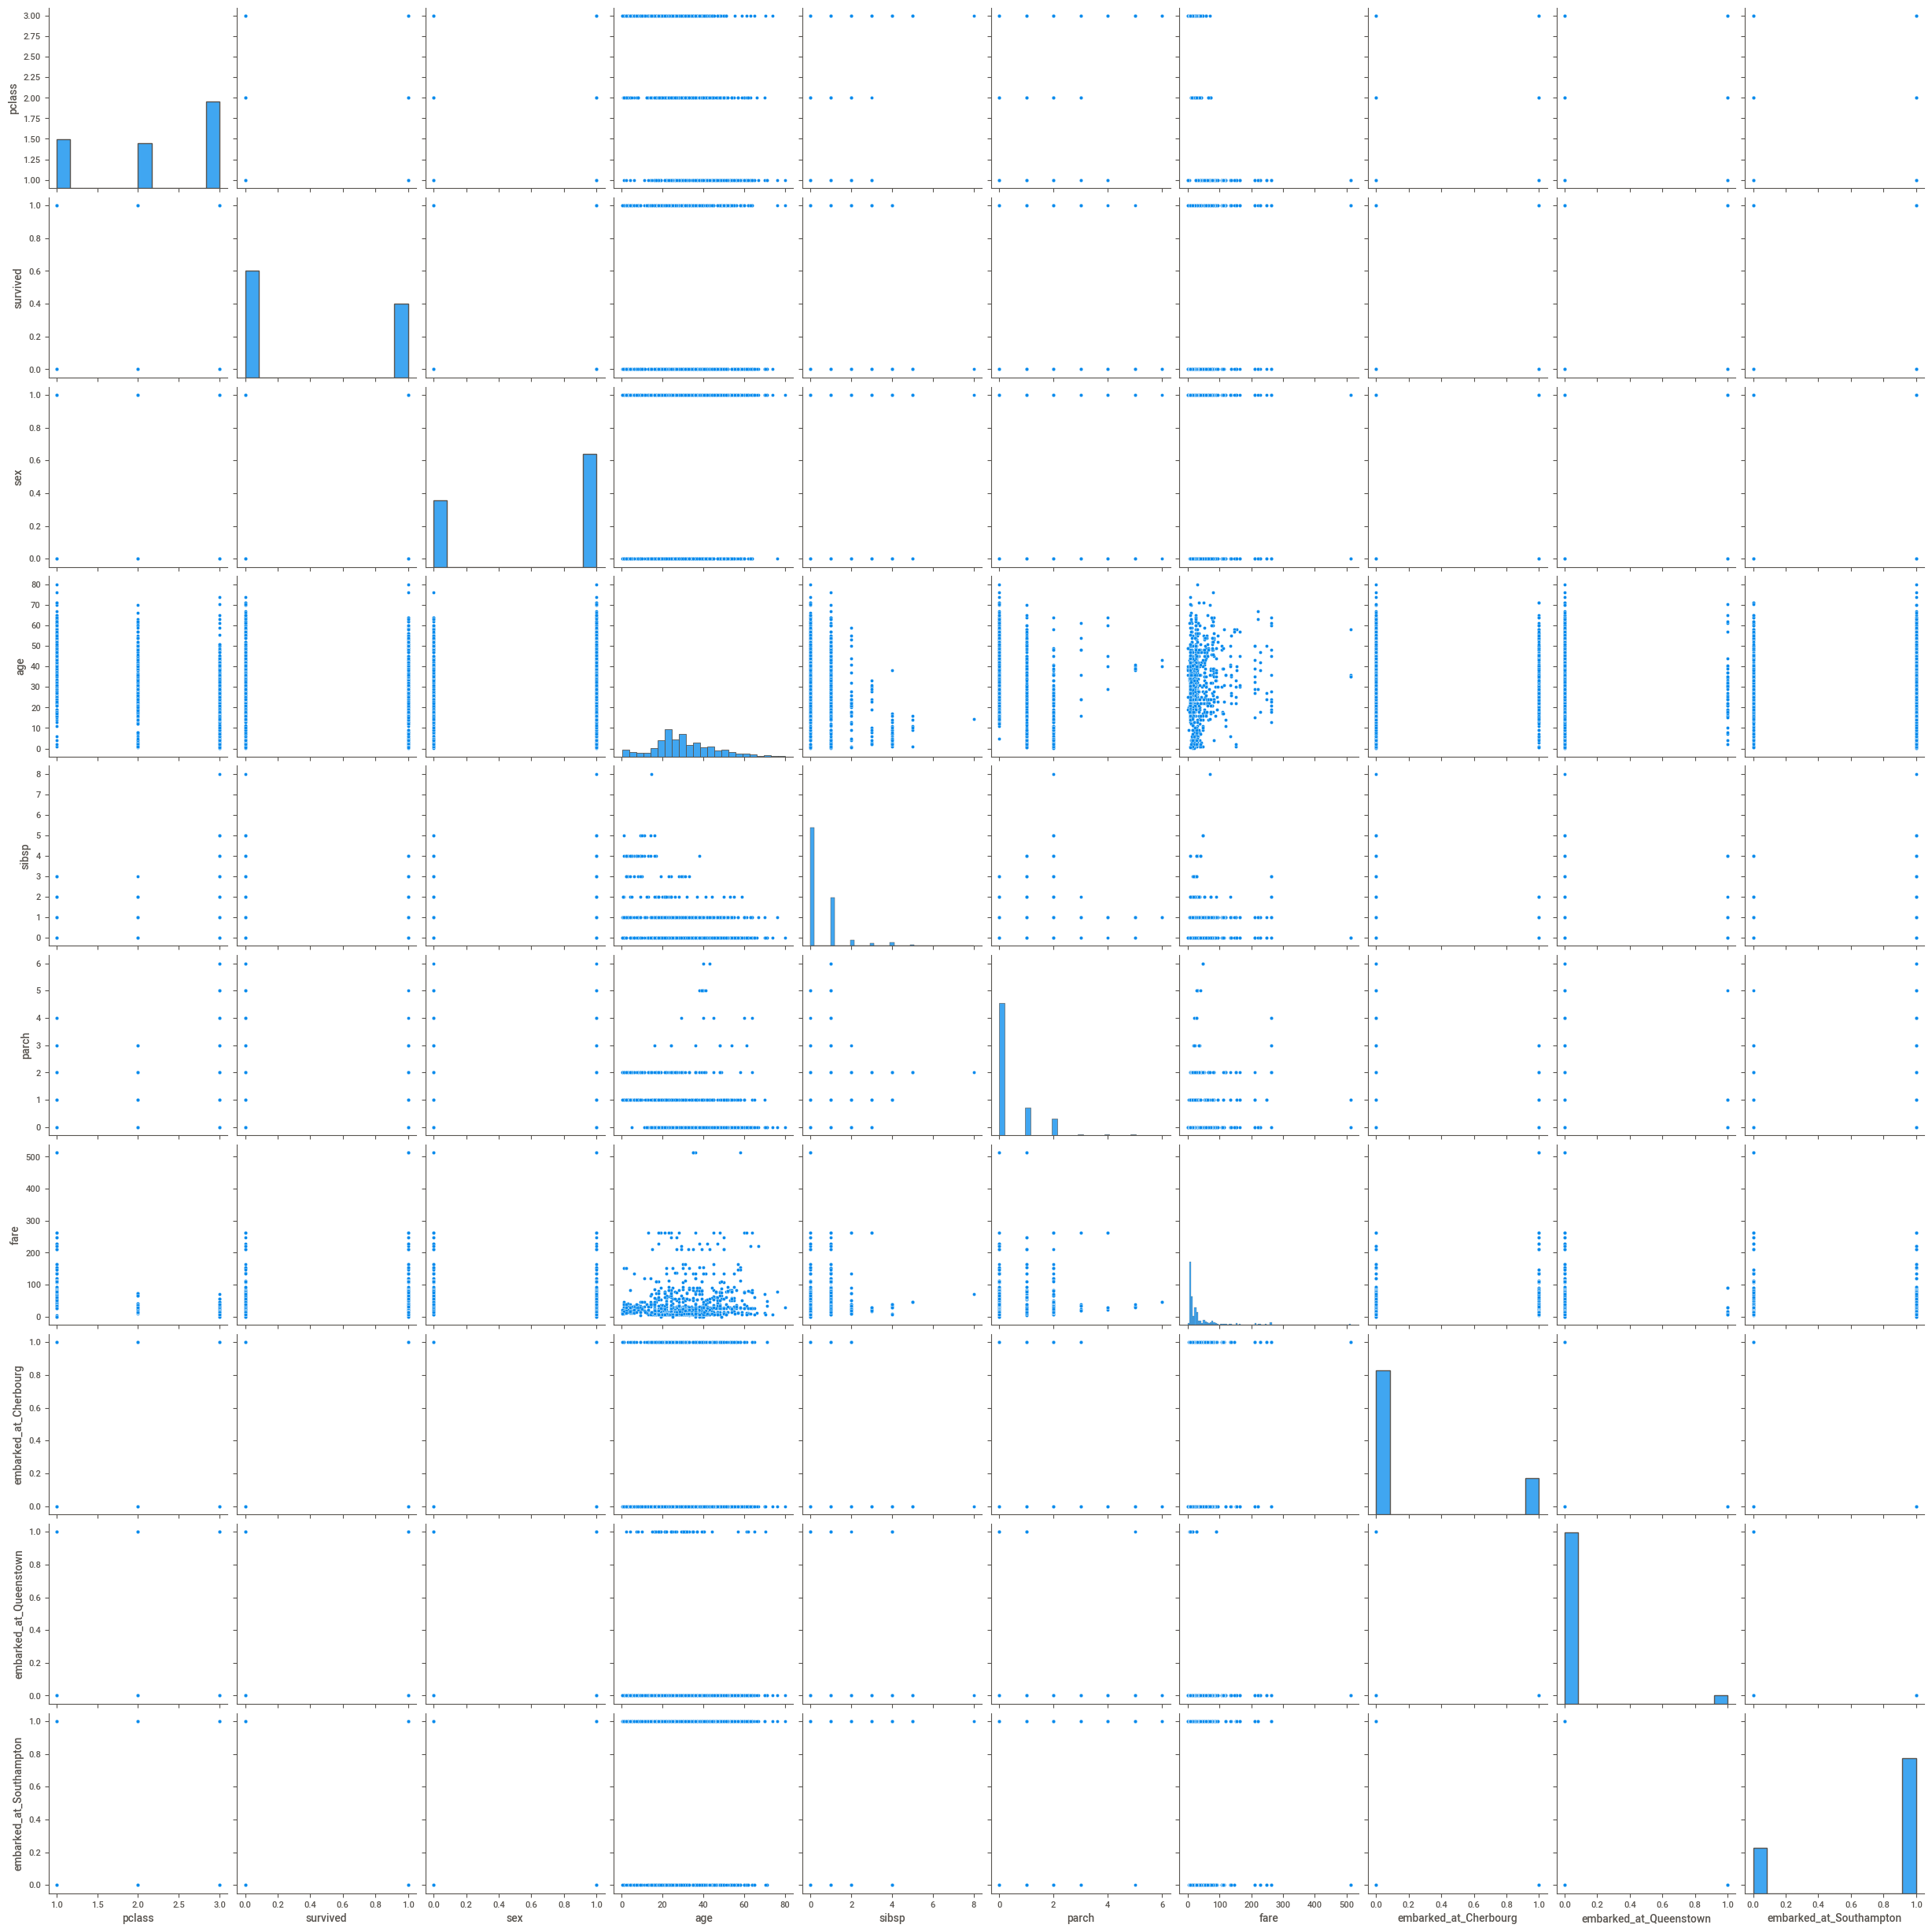

In [260]:
sns.pairplot(titanic)

In [240]:
# grouper par class et sex
group_class_sex = titanic.groupby(['pclass', 'sex'])

In [241]:
group_class_sex.mean()

survived        age     sibsp     parch        fare  \
pclass sex                                                        
1      0    0.962406  37.037594  0.556391  0.503759  111.996900   
       1    0.350993  41.029250  0.403974  0.331126   74.818213   
2      0    0.893204  27.499191  0.514563  0.669903   23.267395   
       1    0.145570  30.815401  0.354430  0.208861   20.934335   
3      0    0.473684  22.185307  0.736842  0.796053   14.655758   
       1    0.169054  25.962273  0.487106  0.286533   12.103375   

            embarked_at_Cherbourg  embarked_at_Queenstown  \
pclass sex                                                  
1      0                 0.488722                0.015038   
       1                 0.417219                0.006623   
2      0                 0.106796                0.009709   
       1                 0.082278                0.025316   
3      0                 0.144737                0.138158   
       1                 0.108883                0.060172   

            embarked_at_Southampton  
pclass sex                           
1      0                   0.481203  
       1                   0.576159  
2      0                   0.883495  
       1                   0.892405  
3      0                   0.717105  
       1                   0.830946

In [242]:
group_class_sex.count()

survived  age  sibsp  parch  fare  embarked_at_Cherbourg  \
pclass sex                                                             
1      0         133  133    133    133   133                    133   
       1         151  151    151    151   151                    151   
2      0         103  103    103    103   103                    103   
       1         158  158    158    158   158                    158   
3      0         152  152    152    152   152                    152   
       1         349  349    349    349   348                    349   

            embarked_at_Queenstown  embarked_at_Southampton  
pclass sex                                                   
1      0                       133                      133  
       1                       151                      151  
2      0                       103                      103  
       1                       158                      158  
3      0                       152                      152  
       1                       349                      349

In [243]:
titanic['age'] < 18

0       False
1        True
2        True
3       False
4       False
        ...  
1301    False
1304     True
1306    False
1307    False
1308    False
Name: age, Length: 1046, dtype: bool

In [244]:
titanic[titanic['age'] < 18 ]

,pclass,survived,sex,age,sibsp,parch,fare,embarked_at_Cherbourg,embarked_at_Queenstown,embarked_at_Southampton
1,1,1,1,0.9167,1,2,151.550003,0,0,1
2,1,0,0,2.0000,1,2,151.550003,0,0,1
53,1,0,1,17.0000,0,0,47.099998,0,0,1
54,1,1,1,11.0000,1,2,120.000000,0,0,1
55,1,1,0,14.0000,1,2,120.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1265,3,0,0,10.0000,0,2,24.150000,0,0,1
1275,3,0,1,16.0000,2,0,18.000000,0,0,1
1279,3,0,0,14.0000,0,0,7.854200,0,0,1
1300,3,1,0,15.0000,1,0,14.454200,1,0,0


<AxesSubplot:>

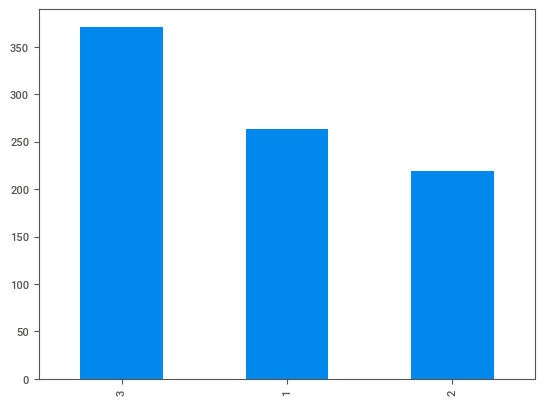

In [245]:
# individu  > 18, compter le nombre d'individu par pclass
titanic[titanic['age'] > 18 ]["pclass"].value_counts().plot.bar()

In [261]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   1045 non-null   int64  
 1   survived                 1045 non-null   int64  
 2   sex                      1045 non-null   int64  
 3   age                      1045 non-null   float64
 4   sibsp                    1045 non-null   int64  
 5   parch                    1045 non-null   int64  
 6   fare                     1045 non-null   float64
 7   embarked_at_Cherbourg    1045 non-null   uint8  
 8   embarked_at_Queenstown   1045 non-null   uint8  
 9   embarked_at_Southampton  1045 non-null   uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 68.4 KB


In [247]:
titanic.dropna(axis=0, inplace=True)

In [248]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   1045 non-null   int64  
 1   survived                 1045 non-null   int64  
 2   sex                      1045 non-null   int64  
 3   age                      1045 non-null   float64
 4   sibsp                    1045 non-null   int64  
 5   parch                    1045 non-null   int64  
 6   fare                     1045 non-null   float64
 7   embarked_at_Cherbourg    1045 non-null   uint8  
 8   embarked_at_Queenstown   1045 non-null   uint8  
 9   embarked_at_Southampton  1045 non-null   uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 68.4 KB


## Machine learning 🤖🧠
<br>**KneighborsClassifier**
<br>**n_neighbors=2**

1. importer le modele
2. split vos datas
3. instantier le modele
4. fit
5. score
6. predict
7. drop all columns except survived , age, sex , fare, pclass

In [272]:
titanic = titanic[["survived" , "age", "sex" , "pclass"]]

In [273]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1045 non-null   int64  
 1   age       1045 non-null   float64
 2   sex       1045 non-null   int64  
 3   pclass    1045 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 40.8 KB


In [274]:
# Split X => features et y => target
X = titanic.drop(columns=['survived'])
y = titanic.survived

print(X.columns)

Index(['age', 'sex', 'pclass'], dtype='object')


In [275]:
# division train Set et test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())


      age  sex  pclass
431  28.0    1       2
291  39.0    0       1
393  25.0    1       2
65   33.0    0       1
386  18.0    1       2


In [276]:
# import le modele
from sklearn.neighbors import KNeighborsClassifier
KNN_estimor = KNeighborsClassifier(n_neighbors=5)


In [277]:
KNN_estimor.fit(X_train, y_train)

KNeighborsClassifier()

In [278]:
prediction = KNN_estimor.predict(X_test)

In [300]:
type(X_test)

pandas.core.frame.DataFrame

In [279]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y_test)

0.6889952153110048

In [280]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y_test)

0.6889952153110048

In [285]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

In [287]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [289]:
model_tree.score(X_test, y_test)

0.722488038277512

In [290]:
from sklearn.ensemble import RandomForestClassifier
Rnd_Forest_model = RandomForestClassifier()

In [293]:
Rnd_Forest_model.fit(X_train, y_train)
Rnd_Forest_model.score(X_test, y_test)

0.7272727272727273

In [295]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [296]:
log_reg.score(X_test,y_test)

0.7320574162679426

In [297]:
X_train.columns

Index(['age', 'sex', 'pclass'], dtype='object')

In [308]:
arr = [[56, 0, 1]]
# df = pd.DataFrame(arr)
log_reg.predict(arr)

c:\Users\didie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [313]:
def survie(data, name):
    prediction = log_reg.predict([data])
    if prediction == 1:
        print(f"Vous avez survecu Mr {name}")
    else:
        print(f"Mr {name} Ne cherchez pas trop longtemps le diamand Bleu")

In [314]:
survie([45, 1, 1], "Gregory")

Mr Gregory Ne cherchez pas trop longtemps le diamand Bleu


c:\Users\didie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Utilisation du model dans une interface

In [319]:
# Save Model
import joblib


# Save the model to a file
joblib.dump(log_reg, 'titanic_log_reg.pkl')

['titanic_log_reg.pkl']

In [318]:
import joblib

# Load the saved model from the file
loaded_model = joblib.load('titanic_log_reg.pkl')



# make my function
def survie(data, name):
    prediction = loaded_model.predict([data])
    if prediction == 1:
        print(f"Vous avez survecu Mr {name}")
    else:
        print(f"Mr {name} Ne cherchez pas trop longtemps le diamand Bleu")
# Now you can use the loaded model to make predictions
# For example, predict the class of a new data point (X_new)X_new = [[5.1, 3.5, 1.4, 0.2]]  # Sample input data

X_new = [45, 1, 1]
predicted_class = survie(X_new, "Greg")
predicted_class

Mr Greg Ne cherchez pas trop longtemps le diamand Bleu


c:\Users\didie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [281]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# scaled_df = std_scaler.fit_transform(titanic)

In [282]:
# scaled_df

In [283]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=4)
# pca.fit_transform(scaled_df)